In [1]:
!pip install yfinance

In [16]:
import yfinance as yf

# List of Nifty 50 tickers (NSE format with .NS suffix)
nifty_50_tickers = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS", "SBIN.NS", "BHARTIARTL.NS",
    "ASIANPAINT.NS", "ITC.NS", "KOTAKBANK.NS", "LT.NS", "HCLTECH.NS", "AXISBANK.NS", "MARUTI.NS", "SUNPHARMA.NS",
    "TITAN.NS", "BAJFINANCE.NS", "WIPRO.NS", "ULTRACEMCO.NS", "NESTLEIND.NS", "TATASTEEL.NS", "POWERGRID.NS",
    "ONGC.NS", "COALINDIA.NS", "INDUSINDBK.NS", "TECHM.NS", "GRASIM.NS", "ADANIPORTS.NS", "NTPC.NS", "JSWSTEEL.NS",
    "CIPLA.NS", "BAJAJFINSV.NS", "HDFCLIFE.NS", "DIVISLAB.NS", "DRREDDY.NS", "BPCL.NS", "SBILIFE.NS", "EICHERMOT.NS",
    "BRITANNIA.NS", "HEROMOTOCO.NS", "M&M.NS", "HINDALCO.NS", "APOLLOHOSP.NS", "TATAMOTORS.NS", "BAJAJ-AUTO.NS",
    "SHREECEM.NS", "UPL.NS", "ICICIGI.NS", "ICICIPRULI.NS", "DLF.NS"
]

# Fetch historical data (last 10 year)
start_date = "2010-01-07"
end_date = "2019-06-07"

# Download Adjusted Close prices
stock_data = yf.download(nifty_50_tickers, start=start_date, end=end_date)
print(stock_data)


[*********************100%***********************]  51 of 51 completed


Price              Close                                          \
Ticker     ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                               
2010-01-07    109.824646    332.426605    156.045578  182.552109   
2010-01-08    109.695930    331.309021    158.623367  184.936737   
2010-01-11    113.428139    330.843292    158.354568  191.025726   
2010-01-12    115.128784    327.350708    162.487793  191.007553   
2010-01-13    119.476913    331.076111    163.765701  189.369232   
...                  ...           ...           ...         ...   
2019-05-30    394.675842   1181.245605   1311.909546  803.049377   
2019-05-31    401.522186   1216.398560   1343.118530  803.795227   
2019-06-03    409.573853   1332.755859   1392.698975  808.120972   
2019-06-04    410.345276   1308.207642   1356.670410  818.214355   
2019-06-06    411.068451   1317.879517   1363.399048  803.198547   

Price                                          

In [18]:
print(stock_data.shape)

(2321, 255)


In [30]:
import pandas as pd

# Define lookback periods (3-month, 6-month, 12-month momentum)
lookback_periods = {"3M": 63, "6M": 126, "12M": 252}

# Compute momentum returns for each stock and store in a list of DataFrames
momentum_dfs = []
for period, days in lookback_periods.items():
    # Calculate momentum returns explicitly setting fill_method=None
    momentum_return = stock_data['Close'].pct_change(periods=days, fill_method=None)
    momentum_return.columns = pd.MultiIndex.from_product([[period], momentum_return.columns])
    momentum_dfs.append(momentum_return)

# Concatenate the DataFrames along the columns
momentum_df = pd.concat(momentum_dfs, axis=1)


# Ensure the index matches the available dates in stock_data
momentum_df = momentum_df.reindex(stock_data.index)

print(momentum_df.tail())  # Display last few rows

                      3M                                          \
Ticker     ADANIPORTS.NS APOLLOHOSP.NS ASIANPAINT.NS AXISBANK.NS   
Date                                                               
2019-05-30      0.150527      0.044089     -0.016597    0.158276   
2019-05-31      0.175275      0.080789      0.006797    0.151342   
2019-06-03      0.308735      0.143038      0.043626    0.154825   
2019-06-04      0.315456      0.151164      0.013909    0.158628   
2019-06-06      0.310684      0.167798      0.016255    0.124617   

                                                                              \
Ticker     BAJAJ-AUTO.NS BAJAJFINSV.NS BAJFINANCE.NS BHARTIARTL.NS   BPCL.NS   
Date                                                                           
2019-05-30      0.046572      0.333566      0.311504      0.218443  0.215777   
2019-05-31      0.038713      0.321564      0.313097      0.210396  0.189279   
2019-06-03      0.065688      0.318076      0.321061   

In [24]:
print(momentum_df.shape)

(2321, 153)


### List of top momentum stocks for each period(3M,6M,12M)

In [38]:
#Ranking stocks based on the momentum returns
momentum_ranks = momentum_df.rank(axis=1,ascending=False, method = 'first')

# Selcting to 20% stocks for each period
top_20_percent = int(len(momentum_ranks.columns) * 0.2)
selected_momentum_stocks = momentum_ranks.apply(lambda row: row[row <= top_20_percent].index.tolist(), axis=1)


print(selected_momentum_stocks)

Date
2010-01-07                                                   []
2010-01-08                                                   []
2010-01-11                                                   []
2010-01-12                                                   []
2010-01-13                                                   []
                                    ...                        
2019-05-30    [(3M, BAJAJFINSV.NS), (3M, BAJFINANCE.NS), (3M...
2019-05-31    [(3M, BAJAJFINSV.NS), (3M, BAJFINANCE.NS), (3M...
2019-06-03    [(3M, ADANIPORTS.NS), (3M, BAJAJFINSV.NS), (3M...
2019-06-04    [(3M, ADANIPORTS.NS), (3M, BAJAJFINSV.NS), (3M...
2019-06-06    [(3M, ADANIPORTS.NS), (3M, BAJAJFINSV.NS), (3M...
Length: 2321, dtype: object


Constructing equal-weighted momentum portfolio

In [37]:
# Extract only stock names from the tuples
selected_stocks_cleaned = selected_momentum_stocks.apply(lambda x: [stock[1] for stock in x])
print(selected_stocks_cleaned.tail())

Date
2019-05-30    [BAJAJFINSV.NS, BAJFINANCE.NS, ICICIGI.NS, SBI...
2019-05-31    [BAJAJFINSV.NS, BAJFINANCE.NS, ICICIGI.NS, SBI...
2019-06-03    [ADANIPORTS.NS, BAJAJFINSV.NS, BAJFINANCE.NS, ...
2019-06-04    [ADANIPORTS.NS, BAJAJFINSV.NS, BAJFINANCE.NS, ...
2019-06-06    [ADANIPORTS.NS, BAJAJFINSV.NS, BAJFINANCE.NS, ...
dtype: object


In [42]:
#Fixing compute_portfolio_returns
def compute_portfolio_returns(selected_stocks, stock_data):
    stock_returns = stock_data['Close'].pct_change(fill_method = None)  # Compute daily returns for all stocks
    portfolio_returns = []

    for date, stocks in selected_stocks.items():
        valid_stocks = [s for s in stocks if s in stock_returns.columns]  # ✅ Ensure valid stocks
        if valid_stocks:
            daily_return = stock_returns.loc[date, valid_stocks].mean()  # Equal-weighted return
            portfolio_returns.append(daily_return)
        else:
            portfolio_returns.append(None)  # Append NaN if no valid stocks

    return pd.Series(portfolio_returns, index=selected_stocks.index)

# Compute portfolio returns correctly
momentum_portfolio_returns = compute_portfolio_returns(selected_stocks_cleaned, stock_data)

#Display last few portfolio returns
print(momentum_portfolio_returns)


Date
2010-01-07         NaN
2010-01-08         NaN
2010-01-11         NaN
2010-01-12         NaN
2010-01-13         NaN
                ...   
2019-05-30    0.009053
2019-05-31    0.002846
2019-06-03    0.018980
2019-06-04   -0.004626
2019-06-06   -0.017902
Length: 2321, dtype: float64


In [55]:
print(stock_data['Close'].columns)


Index(['ADANIPORTS.NS', 'APOLLOHOSP.NS', 'ASIANPAINT.NS', 'AXISBANK.NS',
       'BAJAJ-AUTO.NS', 'BAJAJFINSV.NS', 'BAJFINANCE.NS', 'BHARTIARTL.NS',
       'BPCL.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS',
       'DLF.NS', 'DRREDDY.NS', 'EICHERMOT.NS', 'GRASIM.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HDFCLIFE.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'ICICIBANK.NS', 'ICICIGI.NS', 'ICICIPRULI.NS',
       'INDUSINDBK.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'KOTAKBANK.NS',
       'LT.NS', 'M&M.NS', 'MARUTI.NS', 'NESTLEIND.NS', 'NTPC.NS', 'ONGC.NS',
       'POWERGRID.NS', 'RELIANCE.NS', 'SBILIFE.NS', 'SBIN.NS', 'SHREECEM.NS',
       'SUNPHARMA.NS', 'TATAMOTORS.NS', 'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS',
       'TITAN.NS', 'ULTRACEMCO.NS', 'UPL.NS', 'WIPRO.NS'],
      dtype='object', name='Ticker')


In [57]:
benchmark_returns = stock_data['Close'].pct_change(fill_method = None).mean(axis=1)


In [61]:
# Compute benchmark returns (use equal-weighted portfolio if ^NSEI not found)
if "^NSEI" in stock_data['Close'].columns:
    benchmark_returns = stock_data['Close']["^NSEI"].pct_change(fill_method=None)
else:
    benchmark_returns = stock_data['Close'].pct_change(fill_method=None).mean(axis=1)  # Equal-weighted benchmark


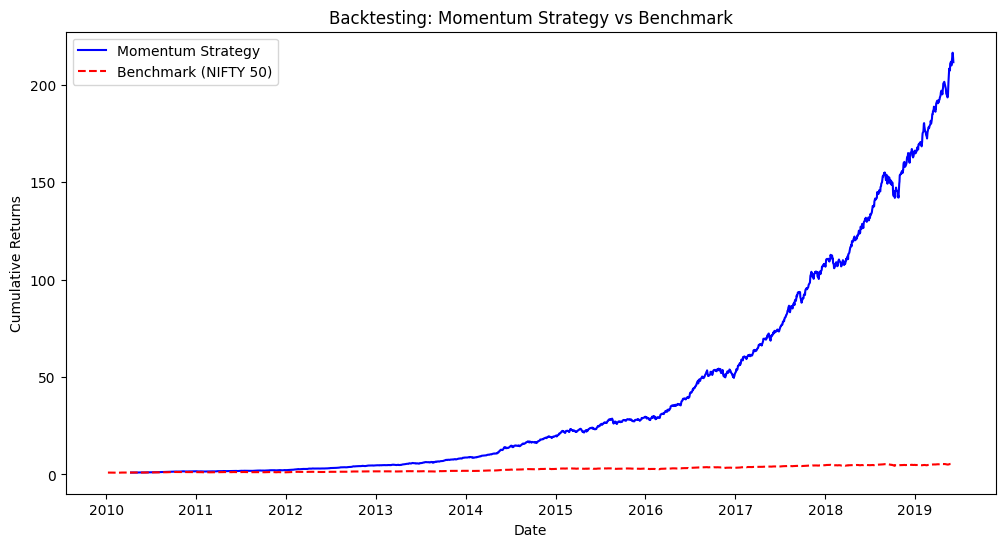

In [62]:
import matplotlib.pyplot as plt

# Compute cumulative returns for both
momentum_cum_returns = (1 + momentum_portfolio_returns).cumprod()
benchmark_cum_returns = (1 + benchmark_returns).cumprod()

# Plot the performance
plt.figure(figsize=(12, 6))
plt.plot(momentum_cum_returns, label="Momentum Strategy", color="blue")
plt.plot(benchmark_cum_returns, label="Benchmark (NIFTY 50)", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.title("Backtesting: Momentum Strategy vs Benchmark")
plt.legend()
plt.show()

###Conclusion Made in the above curve:
1. The momentum strategy significantly outperforms the NIFTY 50 benchmark over the backtesting period (2010-2019).
2. While NIFTY 50 shows steady but low growth, the momentum strategy exhibits exponential growth, especially after 2015.
3. This suggests that your stock selection and rebalancing method effectively captures high-performing stocks
4. The sharp increases in 2017-2019 indicate that the strategy performs exceptionally well in bullish markets
5. The NIFTY 50 returns remain relatively flat compared to the strategy

In [63]:
import numpy as np

# Assuming daily returns
sharpe_ratio = (momentum_portfolio_returns.mean() / momentum_portfolio_returns.std()) * np.sqrt(252)
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")


Sharpe Ratio: 3.97


In [64]:
def max_drawdown(returns):
    cumulative = (1 + returns).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    return drawdown.min()

max_dd = max_drawdown(momentum_portfolio_returns)
print(f"Max Drawdown: {max_dd:.2%}")


Max Drawdown: -10.33%


In [66]:
win_rate = (momentum_portfolio_returns > 0).sum() / len(momentum_portfolio_returns)
print(f"Win Rate: {win_rate:.2%}")


Win Rate: 60.88%


In [47]:
# Check correlation between past momentum and future returns
future_returns = stock_data['Close'].pct_change(periods=30, fill_method=None)  # 1-month future returns
mean_reversion_correlation = momentum_df.corrwith(future_returns)

print(mean_reversion_correlation.sort_values())  # If negative, indicates mean reversion


(12M, HDFCLIFE.NS)      0.146838
(12M, DIVISLAB.NS)      0.202208
(12M, COALINDIA.NS)     0.221109
(12M, ICICIPRULI.NS)    0.238734
(12M, ONGC.NS)          0.247616
                          ...   
TECHM.NS                     NaN
TITAN.NS                     NaN
ULTRACEMCO.NS                NaN
UPL.NS                       NaN
WIPRO.NS                     NaN
Length: 204, dtype: float64
